# WeatherPy
----

#### Observations and Trends
1. It is Observed from the scatter plot "Latitude Vs. Temperature" that the temperatures are higher 10 - 20 degress N and S of Equator and then they fall gradually towards the Pole.

2. There seems to be a weak correlation between Latitude and other Variables such as Humidity , Cloudiness and WindSpeed alike.

3. From the Regression Analysis , there is a promising positive correlation between temperatures and latitudes in the southern hemisphere ; as you get closer to the equator the temperature increases.

4. Again , a regression value of -89.91% gives a clear picture of negative correlation between temperatures and latitude in the nothern hemisphere ; as you move away from the equator the temperature decreases.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#lets build our URL , fetch url from the API documentation
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&q=" 

In [7]:
#------------------check how the json response looks like , for referencing its data-----------
#query_url = f"{base_url}appid={weather_api_key}&q=sortland"
#print(query_url)
#response = requests.get(query_url).json()
#pprint(response)
#---------------------- Test Complete -----------------------------------------------------------------


In [8]:
#Set up lists to hold responses
country = []
lat= []
lng =[]
temp = []
humid = []
cloud = []
w_speed = []


# Loop through the list of cities and perform successive API calls ,append the responses to respective lists.
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"City Name : {response['name']} \nCity Number : {response['id']}\n")
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp']*1.8 - 459.67) # default Unit for temp is kelvin,convert to Fahrenheit
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        w_speed.append(response['wind']['speed']) 
    except KeyError:
              print("City not found, Skipping iteration\n")


City Name : Mount Isa 
City Number : 2065594

City Name : Dikson 
City Number : 1507390

City Name : Hithadhoo 
City Number : 1282256

City Name : Paranaíba 
City Number : 3455065

City Name : Nome 
City Number : 5870133

City Name : Morondava 
City Number : 1058381

City Name : Carballo 
City Number : 3126369

City not found, Skipping iteration

City Name : East London 
City Number : 1006984

City Name : Saint-Philippe 
City Number : 935215

City Name : Albany 
City Number : 5106841

City Name : Marabá 
City Number : 3395503

City Name : Safi 
City Number : 2537881

City Name : Mar del Plata 
City Number : 3430863

City Name : Carnarvon 
City Number : 2074865

City Name : Saint Paul Harbor 
City Number : 5866583

City Name : Careiro da Várzea 
City Number : 3402920

City Name : Kapaa 
City Number : 5848280

City Name : Deputatsky 
City Number : 2028164

City Name : Ushuaia 
City Number : 3833367

City Name : Nabire 
City Number : 1634614

City Name : Bredasdorp 
City Number : 1015776


City Name : Broken Hill 
City Number : 2173911

City Name : Mińsk Mazowiecki 
City Number : 764679

City Name : Kabinda 
City Number : 215527

City Name : Labytnangi 
City Number : 1500933

City Name : Phalombe 
City Number : 924206

City Name : Ankang 
City Number : 1789065

City Name : Grand Gaube 
City Number : 934479

City Name : Sitka 
City Number : 5557293

City Name : Ordynskoye 
City Number : 1496100

City Name : Saint Anthony 
City Number : 5044290

City Name : Biak 
City Number : 1637001

City Name : Okhotsk 
City Number : 2122605

City Name : Maceió 
City Number : 3395981

City Name : Karema 
City Number : 158321

City not found, Skipping iteration

City Name : Comodoro Rivadavia 
City Number : 3860443

City Name : Vieques 
City Number : 4568570

City Name : Sola 
City Number : 2134814

City Name : Ponta do Sol 
City Number : 2264557

City Name : Port Lincoln 
City Number : 2063036

City Name : Pecos 
City Number : 5528182

City Name : Fare 
City Number : 4034496

City Name 

City Name : Ust-Maya 
City Number : 2013918

City Name : San Vicente 
City Number : 3428068

City Name : Te Anau 
City Number : 2181625

City Name : Sovetskiy 
City Number : 1491230

City Name : Alofi 
City Number : 4036284

City Name : Jackson 
City Number : 5733351

City Name : Murgab 
City Number : 1218612

City not found, Skipping iteration

City Name : Sergeevka 
City Number : 1519385

City Name : Kuching 
City Number : 1735634

City Name : Port Blair 
City Number : 1259385

City Name : Mayachnyy 
City Number : 528380

City Name : Vardø 
City Number : 777019

City Name : Morgan City 
City Number : 4333811

City Name : Pāsighāt 
City Number : 1260206

City Name : Itarema 
City Number : 3393692

City Name : Jumla 
City Number : 1283285

City Name : Orlik 
City Number : 1496073

City not found, Skipping iteration

City Name : Bagé 
City Number : 3471196

City Name : Belmonte 
City Number : 3470137

City not found, Skipping iteration

City Name : Nizwá 
City Number : 286987

City Name

City Name : Dawlatabad 
City Number : 1142226

City Name : Cody 
City Number : 5821593

City Name : Tuatapere 
City Number : 2180815

City Name : Zhaotong 
City Number : 1784841

City Name : Atasū 
City Number : 1526041

City Name : Firminy 
City Number : 3018455

City not found, Skipping iteration

City not found, Skipping iteration

City Name : Marawi 
City Number : 1701054

City Name : Carnot 
City Number : 2387495

City Name : Maryville 
City Number : 4639848

City Name : Itaituba 
City Number : 3397967

City Name : Zhigansk 
City Number : 2012530

City Name : Pashiya 
City Number : 512413

City Name : Port Pirie 
City Number : 2063030

City Name : Milledgeville 
City Number : 4209448

City Name : Solnechnyy 
City Number : 2016307

City Name : Arroio Grande 
City Number : 3471422

City Name : Constitución 
City Number : 3893726

City Name : Omsukchan 
City Number : 2122493

City Name : Baruun-Urt 
City Number : 2032614

City Name : Paamiut 
City Number : 3421193

City Name : Flin F

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Zip the list of the responses               
zippedList = list(zip(cities,country,lat,lng,temp,humid,cloud,w_speed))

#Convert to a DataFrame and Name the Columns
cityWeather = pd.DataFrame(zippedList, columns = ['City' ,'Country','Latitude','Longitude','Temperature (F)', 'Humidity (%)' , 'Cloudiness (%)' , 'Wind Speed (mph)'])


# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cityWeather.to_csv("city_weather.csv", encoding="utf-8", index=False)

print("\n\n... Below is the current weather for the Cities selected randomly ...")
cityWeather



... Below is the current weather for the Cities selected randomly ...


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mount isa,AU,-20.73,139.50,91.400,16,30,4.10
1,dikson,RU,73.51,80.55,-1.012,94,61,1.64
2,hithadhoo,MV,-0.60,73.08,84.344,69,47,3.06
3,paranaiba,BR,-19.68,-51.19,73.130,71,20,1.39
4,nome,US,64.50,-165.41,31.118,86,90,2.10
...,...,...,...,...,...,...,...,...
557,zhaotong,RU,56.57,37.43,50.000,34,98,5.00
558,atasu,PK,25.37,68.31,79.088,49,85,6.57
559,firminy,GB,50.12,-5.54,47.552,70,13,9.30
560,chagda,ZM,-16.81,26.95,62.870,40,16,0.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

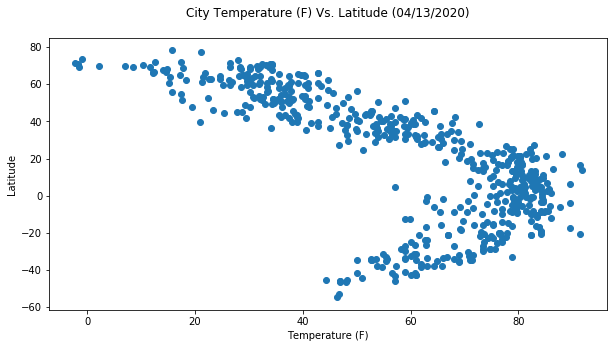

In [10]:
# create a plot canvas 
plt.figure(figsize=(10,5))

# add x,y values to it
x_values = cityWeather['Temperature (F)']
y_values = cityWeather['Latitude']

# plot it 
plt.scatter(x_values,y_values)

# label x,y axes
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

"""
Python time method strftime() converts a tuple or struct_time representing a time as returned by gmtime() or 
localtime() to a string as specified by the format argument.
If t is not provided, the current time as returned by localtime() is used. format must be a string.
Following is the syntax for strftime() method −

time.strftime(format[, t])

"""

today = time.strftime("%m/%d/%Y")
plt.title(f"City Temperature (F) Vs. Latitude ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Temp.png')

plt.show()

The code above uses the object "plt" and calls series of methods on it to set x &  y axes values , set labels , titles and uses the obj.scatter() method to scatter plot. 

Its Pretty clear from the above plot that the temperatures are higher 10 - 20 degress N and S of Equator and then they fall gradually towards the Pole.

#### Latitude vs. Humidity Plot

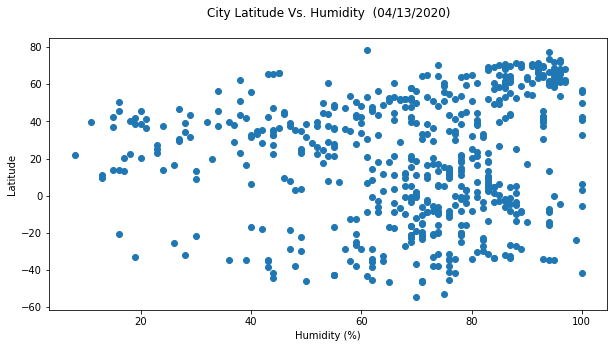

In [11]:

plt.figure(figsize=(10,5))

x_values = cityWeather['Humidity (%)']
y_values = cityWeather['Latitude']

plt.scatter(x_values,y_values)

plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude Vs. Humidity  ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Humidity.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Humidity.


#### Latitude vs. Cloudiness Plot

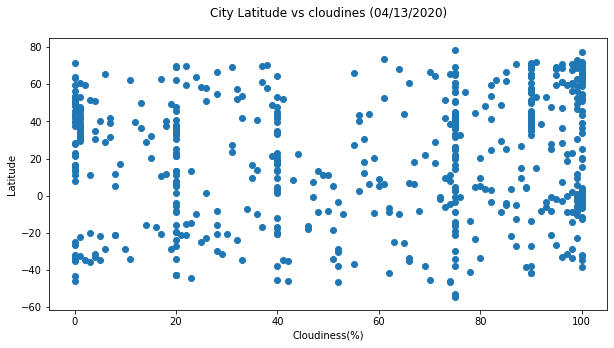

In [12]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Cloudiness (%)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Cloudiness(%)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs cloudines ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.Cloudiness.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Cloudiness.



#### Latitude vs. Wind Speed Plot

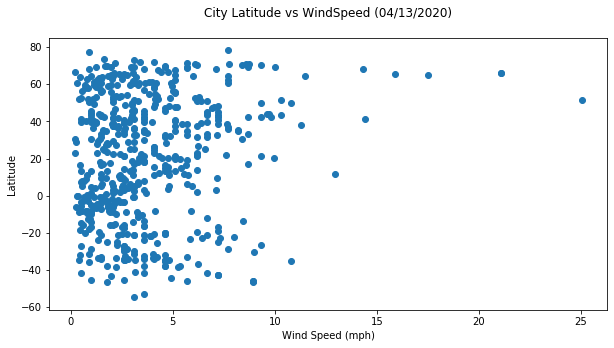

In [13]:

plt.figure(figsize=(10,5))

y_values = cityWeather['Latitude']
x_values = cityWeather['Wind Speed (mph)']

plt.scatter(x_values,y_values)

plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

today = time.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs WindSpeed ({today})\n")

# save the plot and display
plt.savefig('Lat_Vs.WindSpeed.png')

plt.show()

No Discrete Pattern that can describe the relationship between Latitude and Wind Speeds.


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern and Southern Hemisphere DataFrames

# Extract latitudes above and below of 0 degress (Equator) to get the hemispheres
northern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) > 0, :]
southern_hem = cityWeather.loc[pd.to_numeric(cityWeather["Latitude"]).astype(float) < 0,:] 


####  Northern Hemisphere -  Temp vs. Latitude Linear Regression

The r-squared value is: -91.26 %


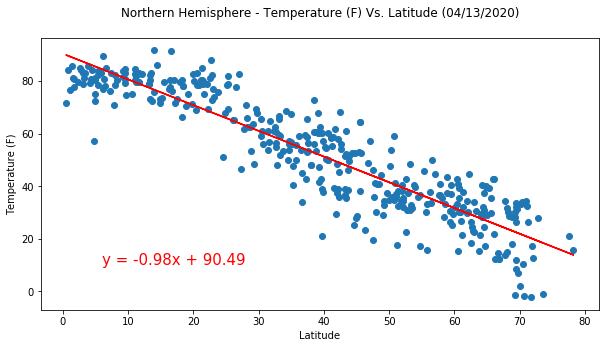

In [16]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Temperature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Northern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.



####  Southern Hemisphere -  Temp vs. Latitude Linear Regression

Line Equation : y = 0.6x + 83.2
The r-squared value is: 75.1 %


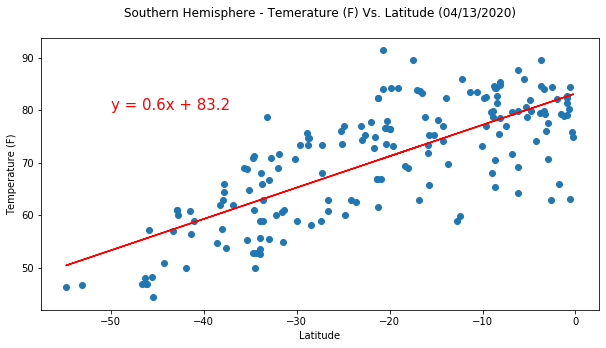

In [18]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Temperature (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'Line Equation : {line_eq}')

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50 , 80),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Temerature (F) Vs. Latitude ({today})\n')

# save the plot and display
plt.savefig('Regression_Southern_Temp_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 29.65 %


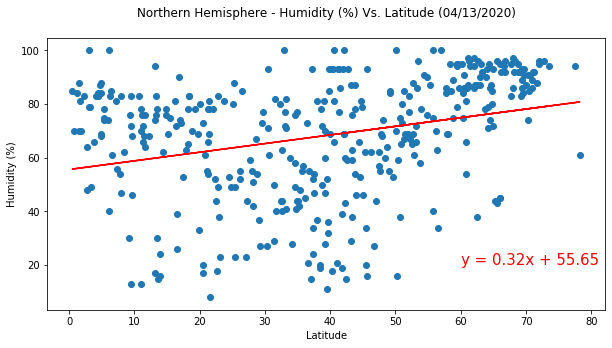

In [20]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much correlation.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 28.4 %


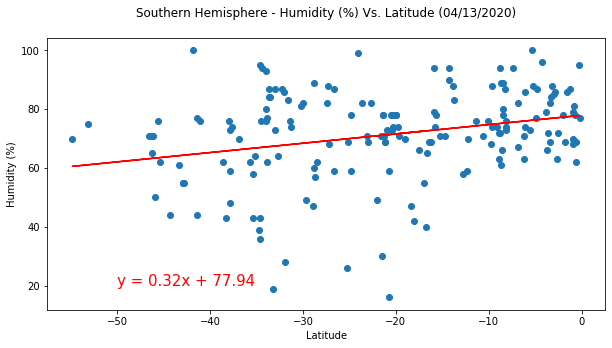

In [29]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Humidity (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title(f'Southern Hemisphere - Humidity (%) Vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Humidity_Vs_Lat.png')

print(f"The r-squared value is: {round((rvalue * 100),2)} %")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 17.06 %


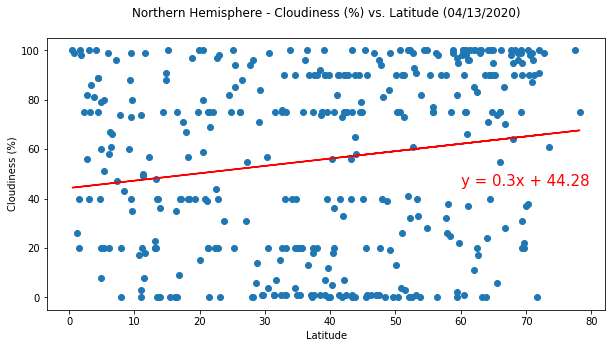

In [23]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,45),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not show
much correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 32.86 %


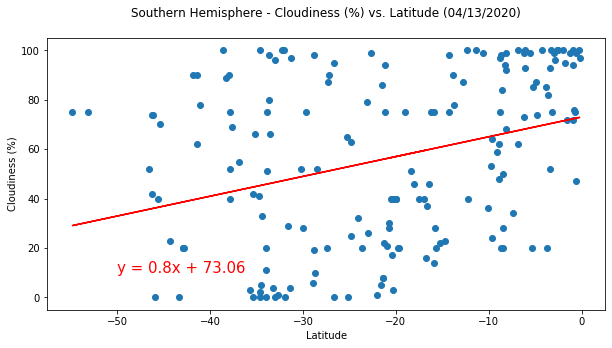

In [27]:
plt.figure(figsize=(10,5))

x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Cloudiness (%)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_Cloudiness_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of a correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 14.52 %


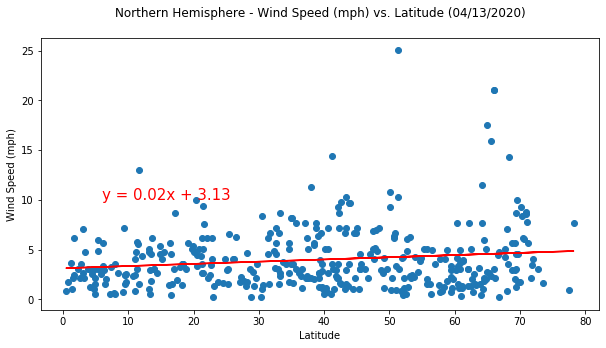

In [26]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(northern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hem['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Northern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()


The regression does not display much of correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -44.55 %


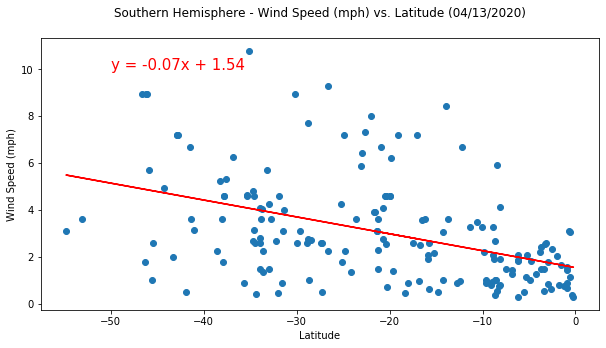

In [31]:
plt.figure(figsize=(10,5))


x_values = pd.to_numeric(southern_hem['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hem['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


today = time.strftime("%m/%d/%Y")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude ({today})\n')

plt.savefig('Regression_Southern_WindSpeed_Vs_Lat.png')
print(f"The r-squared is: {round((rvalue * 100),2)} %")

plt.show()

The regression does not display much of correlation.